# **Machine Learning - Empleos y Salarios en el campo de la Ciencia de Datos**

**Integrantes:**
* Liliana Orozco: lilianaorozco.learning@gmail.com
* Jazmín Cardoso: jazcardoso21@gmail.com
* Maria Paulina Velásquez: mapaulina09@hotmail.com
* Alejandra Paredes: caliopelino3@gmail.com


## **Definición del proyecto con Machine Learning**

El Machine Learning (ML) es una rama de la inteligencia artificial que se enfoca en la construcción de sistemas capaces de aprender de los datos, identificar patrones y tomar decisiones con mínima intervención humana.

Los modelos se entrenan utilizando grandes conjuntos de datos para predecir resultados o clasificar información en categorías basándose en sus características aprendidas.

Este proyecto de ML utilizando el dataset de "Trabajos en Data" de Kaggle se centra en analizar y predecir tendencias del mercado laboral en el ámbito de la ciencia de datos. Este dataset incluye información variada sobre roles laborales, tecnologías requeridas, ubicación, nivel de experiencia, entre otros aspectos relevantes del ámbito laboral en ciencia de datos.

El objetivo del proyecto es desarrollar un modelo predictivo que pueda identificar las tendencias emergentes en el mercado laboral de ciencia de datos, ayudando a los profesionales a entender qué habilidades son más demandadas y cuáles son los perfiles laborales más buscados.

Del mismo modo, este proyecto busca abarcar el desarrollo de un modelo predictivo clasificador. Se busca construir un sistema que, basado en diversas características de entrada, pueda predecir con precisión el tipo de trabajo (`job_category`) correspondiente a cada instancia de datos. Esta tarea clasificatoria es crucial para proporcionar una herramienta eficiente que ayude a asignar automáticamente categorías laborales a los datos entrantes, facilitando así la gestión y organización de información en entornos laborales y empresariales. La implementación exitosa de este modelo clasificador permitirá optimizar procesos de clasificación de trabajos de manera automatizada, ofreciendo una solución valiosa para mejorar la eficiencia y la productividad en diversos ámbitos profesionales.

Los elementos clave que caracterizan a este proyecto de ML incluyen la recopilación y preparación de datos, selección de características relevantes para el modelo, elección de algoritmos de ML adecuados, entrenamiento y validación de modelos y finalmente, la interpretación y comunicación de los resultados para proporcionar insights valiosos a profesionales y empresas del sector.

**Dataset utilizado:** https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data

## **Inicialización**

Importación de librerías y lectura inicial del dataset.

In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# K-Means
from sklearn.cluster import KMeans

# Naïve Bayes
from sklearn.naive_bayes import GaussianNB

# Árbol de Decisión
from sklearn.ensemble import RandomForestClassifier as forest

# Redes Neuronales
from sklearn.neural_network import MLPClassifier

In [395]:
df = pd.read_csv('/content/jobs_in_data.csv')

In [396]:
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


## **Análisis Exploratorio Básico**

El análisis exploratorio de datos constituye una etapa fundamental en el proyecto, pues permite comprender a fondo las características subyacentes del dataset utilizado. Al implementarlo, además de mejorar la capacidad para tomar decisiones informadas sobre cómo proceder con el análisis posterior, también ayuda a visualizar, conocer y garantizar la integridad y la calidad de los datos.

Si se desea explorar más a fondo el conjunto de datos, se recomienda consultar el siguiente repositorio donde se encontrará un análisis detallado de las tendencias y correlaciones entre todas las variables del conjunto de datos.

**URL:** https://github.com/paulinavelasquezc/Data-Science-BEDU/blob/main/Jobs_and_Salaries_in_Data_Science_BEDU.ipynb

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


### Tamaño

El dataset tiene un tamaño de 12 columnas o atributos y 9355 filas u observaciones.

In [398]:
df.shape

(9355, 12)

###Columnas

La siguiente información fue obtenida del manual de datos dado por Kaggle:



*   **work_year:** El año en que se registraron los datos. Este campo indica el
contexto temporal de los datos, importante para comprender las tendencias salariales a lo largo del tiempo.

*   **job_title:** El título específico de la función laboral, como "Científico de datos", "Ingeniero de datos" o "Analista de datos". Esta columna es crucial para comprender la distribución salarial entre las distintas funciones especializadas dentro del campo de los datos.

*   **job_category:** Clasificación del puesto de trabajo en categorías más amplias para facilitar el análisis. Puede incluir áreas como "Análisis de datos", "Aprendizaje automático", "Ingeniería de datos", etc.

*   **salary_currency:** La moneda en la que se paga el salario, como USD, EUR, etc. Esto es importante para la conversión de divisas y para comprender el valor real del salario en un contexto global.

*   **salary:** El salario bruto anual del rol en la moneda local. Esta cifra de salario bruto es clave para las comparaciones salariales regionales directas.

*   **salary_in_usd:** El salario bruto anual convertido a dólares estadounidenses (USD). Esta conversión de moneda uniforme ayuda en las comparaciones y análisis salariales globales.

*   **employee_residence:** El país de residencia del empleado. Este dato puede utilizarse para explorar las diferencias salariales geográficas y las variaciones del coste de la vida.


*   **experience_level:** Clasifica el nivel de experiencia profesional del empleado. Las categorías más comunes pueden ser "principiante", "medio", "superior" y "ejecutivo", lo que permite comprender cómo influye la experiencia en el salario de los puestos relacionados con los datos.

*   **employment_type:** Especifica el tipo de empleo, como "jornada completa", "jornada parcial", "contrato", etc. Esto ayuda a analizar cómo afectan las diferentes modalidades de empleo a las estructuras salariales.

*   **work_setting:** El entorno de trabajo, como "A distancia", "En persona" o "Híbrido". Esta columna refleja el impacto de los entornos de trabajo en los niveles salariales del sector de datos.

*   **company_location:** El país en el que está ubicada la empresa. Ayuda a analizar cómo afecta la ubicación de la empresa a las estructuras salariales.

*   **company_size:**  El tamaño de la empresa empleadora, a menudo clasificada en tamaño pequeño (S), mediano (M) y grande (L). Permite analizar cómo influye el tamaño de la empresa en el salario.

In [399]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

### NaNs

El dataset no contiene ningún dato vacío.

In [400]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

### Transformación de datos

In [401]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

El conjunto de datos incluye tres columnas relacionadas con el salario: `salary_currency`, `salary` y `salary_in_usd`. Durante el proceso de entrenamiento de algoritmos, nos concentraremos únicamente en su representación en USD, dado por la columna `salary_in_usd`. Por lo tanto, las columnas `salary_currency` y `salary`, que solo son la representación del salario en su moneda original, serán eliminadas.

In [402]:
df = df.drop(columns=['salary_currency', 'salary'])

Las columnas `job_title`, `employee_residence`, `work_year` y `company_location` también serán excluidas, ya que representan categorías que no son relevantes para el modelo de aprendizaje.

In [403]:
df = df.drop(columns=['job_title', 'employee_residence', 'company_location', 'work_year'])

Con el fin de simplificar el proceso de definición de nuestras variables independientes y dependientes, se optará por remover la columna `job_category` temporalmente y luego reintegrarla al final del conjunto de datos.

In [404]:
job_category = df['job_category']

In [405]:
df = df.drop(columns=['job_category'])

In [406]:
df['job_category'] = job_category

In [407]:
df

,salary_in_usd,experience_level,employment_type,work_setting,company_size,job_category
0,95012,Mid-level,Full-time,Hybrid,L,Data Engineering
1,186000,Senior,Full-time,In-person,M,Data Architecture and Modeling
2,81800,Senior,Full-time,In-person,M,Data Architecture and Modeling
3,212000,Senior,Full-time,In-person,M,Data Science and Research
4,93300,Senior,Full-time,In-person,M,Data Science and Research
...,...,...,...,...,...,...
9350,165000,Senior,Full-time,Remote,L,Data Management and Strategy
9351,412000,Senior,Full-time,Remote,L,Data Science and Research
9352,151000,Mid-level,Full-time,Remote,L,Data Science and Research
9353,105000,Entry-level,Full-time,Remote,S,Data Science and Research


En previsión de los algoritmos que se utilizarán en el proceso de aprendizaje automático, se llevarán a cabo transformaciones en varias columnas categóricas de interés. Estas transformaciones permitirán representar cada categoría mediante un número, lo que facilitará el análisis y la interpretación de los datos durante el proceso de modelado.

`job_category`

En primer lugar, se contabilizó el total de valores únicos.
Seguido de ello, se reemplazaron las variables categóricas por valores numéricos con la finalidad de poder utilizalos posteriormente.

De este modo, los datos convertidos guardan la siguiente relación:

* Data Engineering = 0
* Data Architecture and Modeling = 1
* Data Science and Research = 2
* Machine Learning and AI = 3
* Data Analysis = 4
* Leadership and Management = 5
* BI and Visualization = 6
* Data Quality and Operations = 7
* Data Management and Strategy = 8
* Cloud and Database = 9

In [408]:
df['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [409]:
df['job_category'].nunique()

10

In [410]:
df['job_category'] = df['job_category'].replace({'Data Engineering': '0', 'Data Architecture and Modeling': '1', 'Data Science and Research': '2',
                                                 'Machine Learning and AI' : '3', 'Data Analysis' : '4' , 'Leadership and Management' : '5',
                                                 'BI and Visualization' : '6', 'Data Quality and Operations' : '7', 'Data Management and Strategy' : '8',
                                                 'Cloud and Database' : '9'})

`experience_level`

Los datos convertidos guardan la siguiente relación:

* Entry-level = 0
* Mid-level = 1
* Senior = 2
* Executive = 3


In [411]:
df['experience_level'].unique()

array(['Mid-level', 'Senior', 'Executive', 'Entry-level'], dtype=object)

In [412]:
df['experience_level'].nunique()

4

In [413]:
df['experience_level'] = df['experience_level'].replace({'Entry-level': '0', 'Mid-level': '1', 'Senior': '2',
                                                 'Executive' : '3'})

`employment_type`

Los datos convertidos guardan la siguiente relación:

* Freelance = 0
* Contract = 1
* Part-time = 2
* Full-time = 3


In [414]:
df['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

In [415]:
df['employment_type'].nunique()

4

In [416]:
df['employment_type'] = df['employment_type'].replace({'Freelance': '0', 'Contract': '1', 'Part-time': '2',
                                                 'Full-time' : '3'})

`work_setting`

Los datos convertidos guardan la siguiente relación:

* Remote = 0
* Hybrid = 1
* In-person = 2


In [417]:
df['work_setting'].unique()

array(['Hybrid', 'In-person', 'Remote'], dtype=object)

In [418]:
df['work_setting'].nunique()

3

In [419]:
df['work_setting'] = df['work_setting'].replace({'Remote': '0', 'Hybrid': '1', 'In-person': '2'})

`company_size`

Los datos convertidos guardan la siguiente relación:

* S -> Small = 0
* M -> Medium = 1
* L -> Large = 2

In [420]:
df['company_size'].unique()

array(['L', 'M', 'S'], dtype=object)

In [421]:
df['company_size'].nunique()

3

In [422]:
df['company_size'] = df['company_size'].replace({'S': '0', 'M': '1', 'L': '2'})

Una vez transformados los datos, se hace lectura del dataset para corroborar que efectivamente las transformaciones se llevaron a cabo de manera satisfactoria y las variables categóricas ahora están representadas por valores numéricos.

In [423]:
df

,salary_in_usd,experience_level,employment_type,work_setting,company_size,job_category
0,95012,1,3,1,2,0
1,186000,2,3,2,1,1
2,81800,2,3,2,1,1
3,212000,2,3,2,1,2
4,93300,2,3,2,1,2
...,...,...,...,...,...,...
9350,165000,2,3,0,2,8
9351,412000,2,3,0,2,2
9352,151000,1,3,0,2,2
9353,105000,0,3,0,0,2


In [424]:
df.dtypes

salary_in_usd        int64
experience_level    object
employment_type     object
work_setting        object
company_size        object
job_category        object
dtype: object

In [425]:
df['job_category'] = df['job_category'].astype(int)
df['experience_level'] = df['experience_level'].astype(int)
df['employment_type'] = df['employment_type'].astype(int)
df['work_setting'] = df['work_setting'].astype(int)
df['company_size'] = df['company_size'].astype(int)


In [426]:
df.dtypes

salary_in_usd       int64
experience_level    int64
employment_type     int64
work_setting        int64
company_size        int64
job_category        int64
dtype: object

## **Uso de algoritmos de Machine Learning para Separar, Validar y Evaluar**

En el proyecto, se optó por distribuir los datos en un 80% para entrenamiento, 5% para validación y 15% para prueba, debido principalmente a que la cantidad de datos disponible no supera los 400,000.

Del mismo modo, el conjunto de entrenamiento es lo suficientemente grande como para permitir que el modelo aprenda patrones y relaciones complejas en los datos. El conjunto de validación, aunque más pequeño, es adecuado para ajustar los hiperparámetros del modelo y evitar el sobreajuste durante el entrenamiento. La proporción relativamente pequeña de datos en el conjunto de validación garantiza que el proceso de ajuste de hiperparámetros no se vea comprometido por una cantidad excesiva de datos de validación. Además, el conjunto de prueba proporciona una evaluación robusta e imparcial del rendimiento final del modelo en datos no vistos durante el entrenamiento y la validación, lo que nos da una medida confiable de la capacidad de generalización del modelo en un entorno del mundo real.

Esta distribución se diseñó para maximizar el aprendizaje del modelos con abundantes datos de entrenamiento, permitir ajustes precisos con una porción controlada para validación y asegurar una evaluación fiable con un conjunto de prueba significativo.

In [427]:
x = df.iloc[:, :-1].values  # Todas las columnas excepto la última
y = df.iloc[:, -1].values   # La última columna

In [428]:
def particionar(entradas, salidas, porcentaje_entrenamiento, porcentaje_validacion, porcentaje_prueba):
    temp_size = porcentaje_validacion + porcentaje_prueba
    x_train, x_temp, y_train, y_temp = train_test_split(entradas, salidas, test_size =temp_size)
    if(porcentaje_validacion > 0):
        test_size = porcentaje_prueba/temp_size
        x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = test_size)
    else:
        return [x_train, None, x_temp, y_train, None, y_temp]
    return [x_train, x_val, x_test, y_train, y_val, y_test]

In [429]:
#Particionando en 80% entrenamiento, 5% validacion, 15% prueba
[x_train, x_val, x_test, y_train, y_val, y_test] = particionar(x,y,0.80,0.05,0.15)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(7484, 5)
(467, 5)
(1404, 5)


## **Algoritmos de entrenamiento No Supervisados y Supervisados**

A continuación, se presentarán los diferentes modelos de entrenamiento utilizados para desarrollar un clasificador capaz de predecir el tipo de trabajo (`job_category`).

En el aprendizaje no supervisado, se implementó el algoritmo K-Means para la agrupación de datos. Por otro lado, en el aprendizaje supervisado se emplearon dos enfoques: Árboles de Decisión y Naïve Bayes.

Todos los modelos fueron entrenados y evaluados utilizando el mismo conjunto de entrenamiento y prueba. La evaluación del rendimiento se realizó mediante la medición del *accuracy* utilizando matrices de confusión.

Finalmente, se llevaron a cabo dos experimentos distintos: uno incluyendo la columna de salario y otro sin ella, con el fin de comparar cómo la inclusión de esta variable afecta el rendimiento de los modelos de clasificación.

Se descartó la utilización de regresión lineal para abordar el problema de predicción del tipo de trabajo `job_category` debido a que este problema es de naturaleza clasificatoria y no continua.

La regresión lineal se emplea típicamente para predecir valores numéricos en lugar de clasificar datos en categorías discretas. Dado que el objetivo principal es asignar cada muestra a una categoría específica de trabajo, los modelos de clasificación, como los árboles de decisión, Naive Bayes y las redes neuronales, resultan más apropiados para esta tarea.

## **Aprendizaje No Supervisado**

### K-Means

Al tener 10 posibles salidas, se opta por utilizar 10 clústeres.

In [430]:
k_means = KMeans(n_clusters=10, max_iter=10000)

In [431]:
k_means.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=10)

In [432]:
y_test = y
y_pred = k_means.predict(x)
y_pred

array([9, 4, 2, ..., 5, 9, 9], dtype=int32)

In [433]:
y_test - y_pred

array([-9, -3, -1, ..., -3, -7, -5])

In [434]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

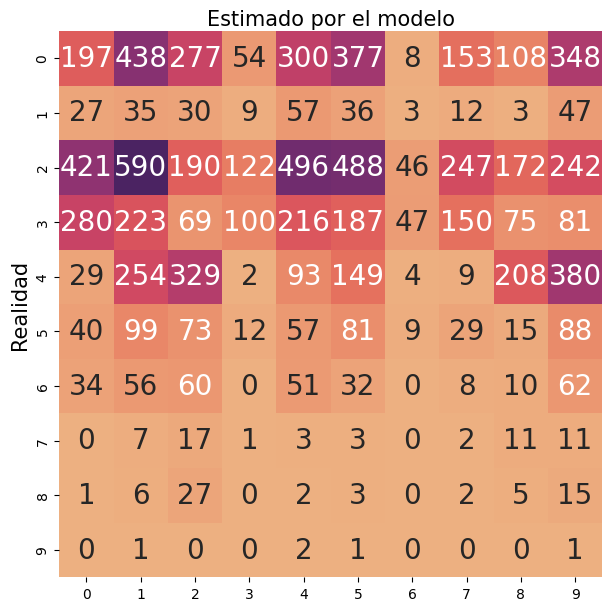

In [435]:
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [436]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[197 438 277  54 300 377   8 153 108 348]
 [ 27  35  30   9  57  36   3  12   3  47]
 [421 590 190 122 496 488  46 247 172 242]
 [280 223  69 100 216 187  47 150  75  81]
 [ 29 254 329   2  93 149   4   9 208 380]
 [ 40  99  73  12  57  81   9  29  15  88]
 [ 34  56  60   0  51  32   0   8  10  62]
 [  0   7  17   1   3   3   0   2  11  11]
 [  1   6  27   0   2   3   0   2   5  15]
 [  0   1   0   0   2   1   0   0   0   1]]
Accuracy: 7.52538749331908%


El algoritmo K-Means produjo un accuracy del 7.52%. Esta baja precisión podría deberse a la naturaleza del algoritmo K-Means, que es más adecuado para problemas de agrupación no supervisada en lugar de clasificación.

### Eliminando columna `salary_in_usd`

In [437]:
df_dropped = df.drop(columns=['salary_in_usd'])
df_dropped

,experience_level,employment_type,work_setting,company_size,job_category
0,1,3,1,2,0
1,2,3,2,1,1
2,2,3,2,1,1
3,2,3,2,1,2
4,2,3,2,1,2
...,...,...,...,...,...
9350,2,3,0,2,8
9351,2,3,0,2,2
9352,1,3,0,2,2
9353,0,3,0,0,2


In [438]:
x_dropped = df_dropped.iloc[:, :-1].values  # Todas las columnas excepto la última
y_dropped = df_dropped.iloc[:, -1].values   # La última columna

In [439]:
k_means = KMeans(n_clusters=10, max_iter=10000)

In [440]:
k_means.fit(x_dropped)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=10)

In [441]:
y_test = y_dropped
y_pred = k_means.predict(x_dropped)
y_pred

array([7, 1, 1, ..., 7, 9, 6], dtype=int32)

In [442]:
y_test - y_pred

array([-7,  0,  0, ..., -5, -7, -2])

In [443]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

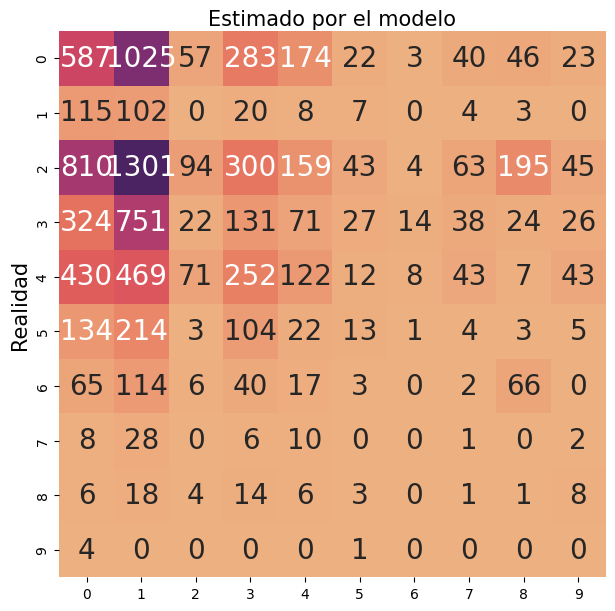

In [444]:
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [445]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[ 587 1025   57  283  174   22    3   40   46   23]
 [ 115  102    0   20    8    7    0    4    3    0]
 [ 810 1301   94  300  159   43    4   63  195   45]
 [ 324  751   22  131   71   27   14   38   24   26]
 [ 430  469   71  252  122   12    8   43    7   43]
 [ 134  214    3  104   22   13    1    4    3    5]
 [  65  114    6   40   17    3    0    2   66    0]
 [   8   28    0    6   10    0    0    1    0    2]
 [   6   18    4   14    6    3    0    1    1    8]
 [   4    0    0    0    0    1    0    0    0    0]]
Accuracy: 11.234633885622662%


Al eliminar la columna `salary_in_usd`, el algoritmo K-Means logró un accuracy del 11.23%, lo que representa un aumento con respecto al accuracy obtenido previamente. Esto sugiere que la eliminación de esta característica numérica pudo haber contribuido a mejorar el rendimiento del modelo.

Una posible explicación es que la columna "salary_in_usd" introducía ruido o redundancia en los datos, lo que afectaba negativamente al modelo. Al descartar esta característica, el modelo pudo enfocarse en las características más relevantes para la clasificación de trabajos, lo que condujo a una mejor capacidad de predicción; sin embargo, continúa teniendo un bajo rendimiento.

## **Aprendizaje Supervisado**

### Árboles de Decisión

In [447]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [448]:
bosque = forest(n_estimators = 800)
bosque.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [449]:
y_pred = bosque.predict(X_test)
y_pred

array([5, 2, 0, ..., 3, 0, 2])

In [450]:
y_test - y_pred

array([-5,  0,  0, ...,  0,  4,  0])

In [451]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

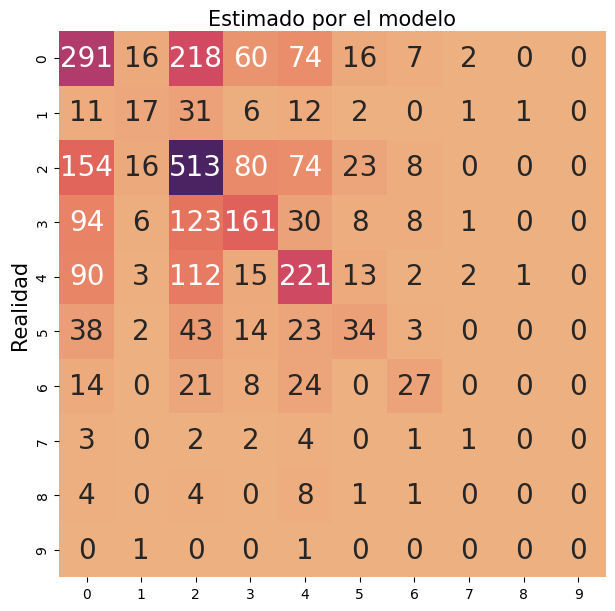

In [452]:
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [453]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[291  16 218  60  74  16   7   2   0   0]
 [ 11  17  31   6  12   2   0   1   1   0]
 [154  16 513  80  74  23   8   0   0   0]
 [ 94   6 123 161  30   8   8   1   0   0]
 [ 90   3 112  15 221  13   2   2   1   0]
 [ 38   2  43  14  23  34   3   0   0   0]
 [ 14   0  21   8  24   0  27   0   0   0]
 [  3   0   2   2   4   0   1   1   0   0]
 [  4   0   4   0   8   1   1   0   0   0]
 [  0   1   0   0   1   0   0   0   0   0]]
Accuracy: 45.065906661916635%


El algoritmo de Árboles de Decisión, sin eliminar la columna de `salary_in_usd`, logró un accuracy del 45.06%.

Árboles de Decisión es un modelo versátil que puede capturar relaciones no lineales y complejas entre las características y la variable objetivo. Además, es posible que la estructura intrínseca de los datos, junto con la configuración específica del árbol de decisión haya influido en el rendimiento del modelo.

 En futuras iteraciones, sería útil explorar técnicas de preprocesamiento de datos, selección de características y ajuste de hiperparámetros para mejorar aún más la precisión del modelo de árbol de decisión en este contexto.

### Eliminando columna `salary_in_usd`

In [454]:
X_train, X_test, y_train, y_test = train_test_split(x_dropped, y_dropped, test_size=0.3)

In [455]:
bosque = forest(n_estimators = 800)
bosque.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [456]:
y_pred = bosque.predict(X_test)
y_pred

array([2, 2, 2, ..., 0, 2, 2])

In [457]:
y_test - y_pred

array([2, 3, 0, ..., 0, 1, 2])

In [458]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

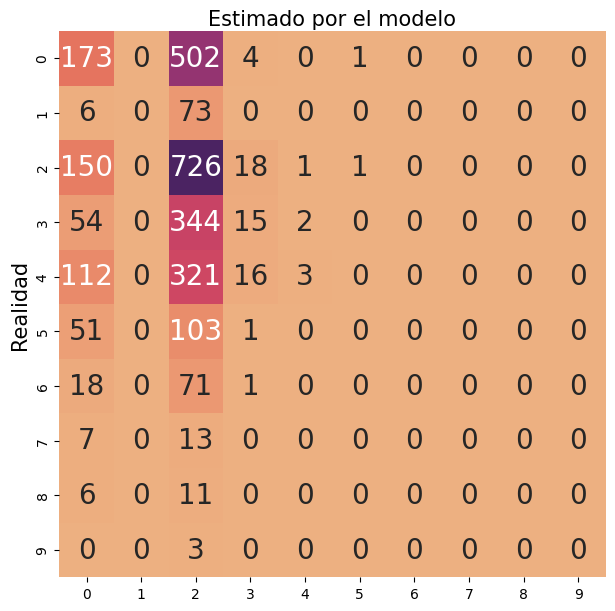

In [459]:
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [460]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[173   0 502   4   0   1   0   0   0   0]
 [  6   0  73   0   0   0   0   0   0   0]
 [150   0 726  18   1   1   0   0   0   0]
 [ 54   0 344  15   2   0   0   0   0   0]
 [112   0 321  16   3   0   0   0   0   0]
 [ 51   0 103   1   0   0   0   0   0   0]
 [ 18   0  71   1   0   0   0   0   0   0]
 [  7   0  13   0   0   0   0   0   0   0]
 [  6   0  11   0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0   0   0   0]]
Accuracy: 32.66832917705736%


Al eliminar la columna `salary_in_usd` el algoritmo de Árboles de Decisión logró un accuracy del 32.66%.

Este resultado sugiere que la eliminación de la columna numérica puede haber afectado negativamente el rendimiento del modelo. La columna `salary_in_usd` podría haber proporcionado información útil para la tarea de clasificación de trabajos, y su eliminación puede haber reducido la capacidad del modelo para distinguir entre las diferentes categorías.

Es posible que otras características en el conjunto de datos no sean suficientes para capturar completamente la variabilidad presente en los datos sin la información proporcionada por la columna de salario.

### Naïve Bayes

In [462]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [463]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [464]:
y_pred = NaiveBayes.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 3, 2])

In [465]:
y_test - y_pred

array([-2,  4,  0, ..., -2, -3,  0])

In [466]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

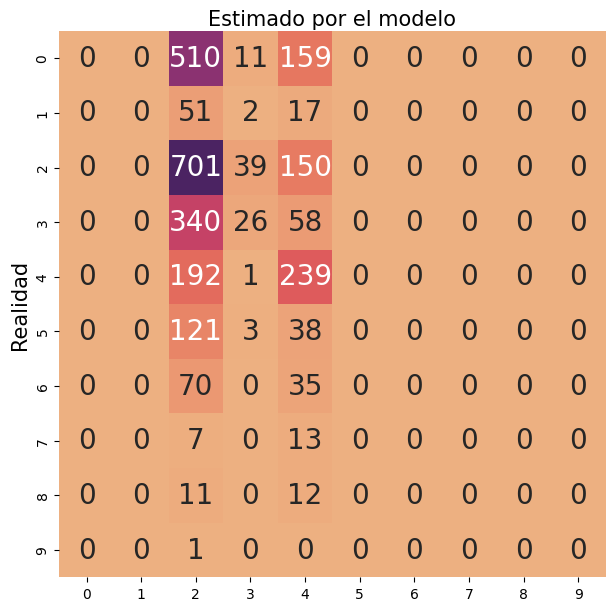

In [467]:
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [468]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[  0   0 510  11 159   0   0   0   0   0]
 [  0   0  51   2  17   0   0   0   0   0]
 [  0   0 701  39 150   0   0   0   0   0]
 [  0   0 340  26  58   0   0   0   0   0]
 [  0   0 192   1 239   0   0   0   0   0]
 [  0   0 121   3  38   0   0   0   0   0]
 [  0   0  70   0  35   0   0   0   0   0]
 [  0   0   7   0  13   0   0   0   0   0]
 [  0   0  11   0  12   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0]]
Accuracy: 34.413965087281795%


El algoritmo de Naïve Bayes logró un accuracy del 34.41%.

Naive Bayes es un algoritmo simple y rápido que asume independencia condicional entre las características, lo que puede ser beneficioso en conjuntos de datos con muchas características. Sin embargo, esta suposición de independencia puede no ser realista en todos los conjuntos de datos, lo que puede limitar el rendimiento del modelo. Además, el rendimiento de Naive Bayes puede verse afectado por la distribución de las características en el conjunto de datos y la presencia de correlaciones entre ellas.

La adecuación de Naive Bayes para este conjunto de datos específico y la elección de distribuciones de probabilidad adecuadas también pueden influir en su rendimiento.

### Eliminando columna `salary_in_usd`

In [469]:
X_train, X_test, y_train, y_test = train_test_split(x_dropped, y_dropped, test_size=0.3)

In [470]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

In [471]:
y_pred = NaiveBayes.predict(X_test)
y_pred

array([6, 7, 9, ..., 1, 6, 7])

In [472]:
y_test - y_pred

array([-6, -5, -6, ...,  1, -6, -5])

In [473]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

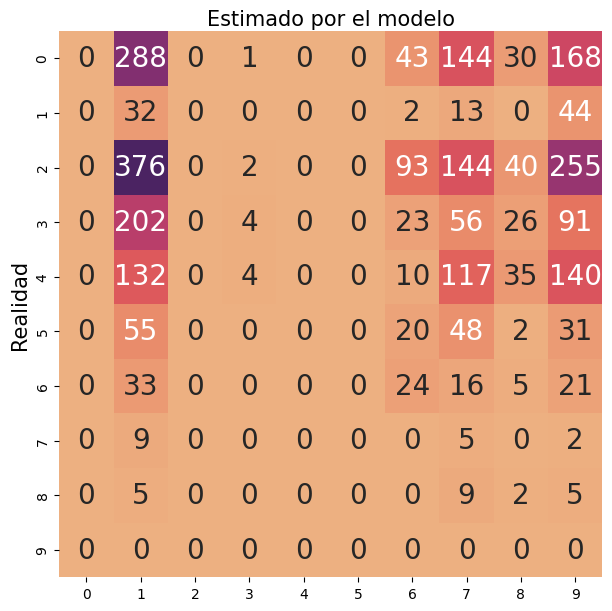

In [474]:
class_names=[0,1,2,3,4,5,6,7,8,9]
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="flare" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [475]:
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[  0 288   0   1   0   0  43 144  30 168]
 [  0  32   0   0   0   0   2  13   0  44]
 [  0 376   0   2   0   0  93 144  40 255]
 [  0 202   0   4   0   0  23  56  26  91]
 [  0 132   0   4   0   0  10 117  35 140]
 [  0  55   0   0   0   0  20  48   2  31]
 [  0  33   0   0   0   0  24  16   5  21]
 [  0   9   0   0   0   0   0   5   0   2]
 [  0   5   0   0   0   0   0   9   2   5]
 [  0   0   0   0   0   0   0   0   0   0]]
Accuracy: 2.386889918061988%


El algoritmo de Naïve Bayes mostró un rendimiento considerablemente bajo, con un accuracy del 2.38% después de eliminar la columna `salary_in_usd`.

Esta drástica caída en la precisión sugiere que la información contenida en la columna de salario podría haber sido crítica para la clasificación de trabajos. La ausencia de esta característica numérica puede haber reducido significativamente la capacidad del modelo para distinguir entre las distintas categorías laborales.

Además, dado que Naive Bayes asume independencia condicional entre las características, la eliminación de una característica numérica clave podría haber afectado aún más la capacidad del modelo para capturar la complejidad de los datos y realizar predicciones precisas.

## **Red Neuronal Artificial**

Ahora se aplicará un modelo de Redes Neuronales para abordar el problema. En este experimento, se varió el número de capas ocultas (hidden layers) entre 15 y 10, y se probaron tres tipos diferentes de funciones de activación.

Este enfoque busca explorar la capacidad del modelo de adaptarse y aprender patrones complejos en los datos, utilizando una arquitectura de red neuronal con diversas configuraciones. La variación en el número de capas ocultas permite investigar cómo la profundidad de la red afecta su capacidad para capturar la estructura subyacente de los datos. Además, la exploración de diferentes funciones de activación ofrece la oportunidad de evaluar cómo la no linealidad de la red impacta en su capacidad de aprendizaje y generalización.

Este enfoque busca encontrar la combinación óptima de arquitectura de red y funciones de activación que maximicen el rendimiento del modelo en la tarea de clasificación de trabajos.

### Función de activación *logistic*

### Hidden layers = 15

In [477]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(15,10),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [478]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[   0    0  887    0    0    0    0    0    0    0]
 [   0    0  111    0    0    0    0    0    0    0]
 [   0    0 1244    0    0    0    0    0    0    0]
 [   0    0  547    0    0    0    0    0    0    0]
 [   0    0  595    0    0    0    0    0    0    0]
 [   0    0  185    0    0    0    0    0    0    0]
 [   0    0  131    0    0    0    0    0    0    0]
 [   0    0   20    0    0    0    0    0    0    0]
 [   0    0   19    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]]
Accuracy: 33.24425440940673%


El modelo de Redes Neuronales con 15 capas ocultas y una función de activación logística logró un rendimiento del 33.24%.

Este resultado sugiere que la red neuronal pudo capturar cierta complejidad en los datos y realizar predicciones con una precisión moderada. La elección de 15 capas ocultas y la función de activación logística puede haber permitido que el modelo aprendiera representaciones no lineales de los datos y detectara patrones más sofisticados en el conjunto de entrenamiento. Sin embargo, el rendimiento del modelo podría ser mejorado aún más mediante la exploración de otras arquitecturas de red, ajuste de hiperparámetros y técnicas de regularización para evitar el sobreajuste.

### Hidden layers = 10

In [479]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(10,10),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [480]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[   0    0  889    0    0    0    0    0    0    0]
 [   0    0  106    0    0    0    0    0    0    0]
 [   0    0 1208    0    0    0    0    0    0    0]
 [   0    0  554    0    0    0    0    0    0    0]
 [   0    0  616    0    0    0    0    0    0    0]
 [   0    0  205    0    0    0    0    0    0    0]
 [   0    0  125    0    0    0    0    0    0    0]
 [   0    0   12    0    0    0    0    0    0    0]
 [   0    0   25    0    0    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0    0    0]]
Accuracy: 32.282202030999464%


En comparación con el modelo de Redes Neuronales con 15 capas ocultas y una función de activación logística, el modelo con 10 capas ocultas y la misma función de activación logística mostró un rendimiento ligeramente inferior, con un accuracy del 32.28%. Esto sugiere que la adición de capas ocultas adicionales en el modelo con 15 capas pudo haber permitido una mayor capacidad de aprendizaje y una mejor captura de la complejidad de los datos en comparación con el modelo de 10 capas. Aunque ambos modelos lograron aprendizajes significativos, la diferencia en el rendimiento podría indicar que una mayor profundidad en la Red Neuronal podría ser más beneficiosa para este problema específico de clasificación.

### Función de activación *tanh*

### Hidden layers = 15

In [481]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(15,10),
                            max_iter=20000,
                            activation ='tanh',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [482]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[   0    0  881    0    0    0    0    0    0    0]
 [   0    0   99    0    0    0    0    0    0    0]
 [   0    0 1211    0    0    0    0    0    0    0]
 [   0    0  584    0    0    0    0    0    0    0]
 [   0    0  588    0    0    0    0    0    0    0]
 [   0    0  199    0    0    0    0    0    0    0]
 [   0    0  121    0    0    0    0    0    0    0]
 [   0    0   29    0    0    0    0    0    0    0]
 [   0    0   27    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]]
Accuracy: 32.36237306253341%


El modelo de Redes Neuronales con 15 capas ocultas y una función de activación tangente hiperbólica (tanh) obtuvo un rendimiento del 32.36%.

Este resultado es comparable al rendimiento del modelo con función de activación logística, lo que sugiere que ambas funciones de activación lograron aprender patrones en los datos con una precisión similar. Sin embargo, es importante destacar las diferencias entre estas funciones de activación. Mientras que la función logística limita la salida de la red entre 0 y 1, la función tanh escala la salida entre -1 y 1, lo que puede permitir una mayor flexibilidad en la representación de los datos y una mejor capacidad para modelar relaciones no lineales complejas.

### Hidden layers = 10

In [483]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(10,10),
                            max_iter=20000,
                            activation ='tanh',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [484]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[   0    0  907    0    0    0    0    0    0    0]
 [   0    0   90    0    0    0    0    0    0    0]
 [   0    0 1198    0    0    0    0    0    0    0]
 [   0    0  580    0    0    0    0    0    0    0]
 [   0    0  580    0    0    0    0    0    0    0]
 [   0    0  202    0    0    0    0    0    0    0]
 [   0    0  134    0    0    0    0    0    0    0]
 [   0    0   22    0    0    0    0    0    0    0]
 [   0    0   26    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0    0    0]]
Accuracy: 32.01496525921967%


En comparación con el modelo de Redes Neuronales que utiliza 15 capas ocultas y una función de activación tangente hiperbólica (tanh), el modelo con 10 capas ocultas y la misma función de activación logró un rendimiento ligeramente inferior, con un accuracy del 32.01%. Esto sugiere que, en este caso particular, la adición de capas ocultas adicionales en el modelo con 15 capas podría haber permitido una mayor capacidad de aprendizaje y una mejor captura de la complejidad de los datos en comparación con el modelo de 10 capas.

### Función de activación *relu*

### Hidden layers = 15

In [485]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(15,10),
                            max_iter=20000,
                            activation ='relu',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [486]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[   0    0  910    0    0    0    0    0    0    0]
 [   0    0   96    0    0    0    0    0    0    0]
 [   0    0 1191    0    0    0    0    0    0    0]
 [   0    0  589    0    0    0    0    0    0    0]
 [   0    0  574    0    0    0    0    0    0    0]
 [   0    0  203    0    0    0    0    0    0    0]
 [   0    0  136    0    0    0    0    0    0    0]
 [   0    0   17    0    0    0    0    0    0    0]
 [   0    0   25    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0]]
Accuracy: 31.827899518973812%


El modelo de redes neuronales con 15 capas ocultas y una función de activación ReLU (Rectified Linear Unit) obtuvo un rendimiento del 31.82%. Este resultado es comparable al rendimiento de los modelos con otras funciones de activación, como la función logística y la tangente hiperbólica. Sin embargo, es importante destacar las diferencias entre estas funciones de activación. Mientras que la función logística y la tangente hiperbólica son funciones sigmoideas que limitan la salida de la red en un rango específico, la función ReLU es una función no lineal que activa solo para valores positivos, estableciendo todos los valores negativos en cero. Esto puede permitir un entrenamiento más rápido y eficiente de la red, ya que evita el problema del desvanecimiento del gradiente.

### Hidden layers = 10

In [487]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)


redNeuronal = MLPClassifier(hidden_layer_sizes=(10,10),
                            max_iter=20000,
                            activation ='relu',
                            tol= 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [488]:
from sklearn.metrics import confusion_matrix
resultado = confusion_matrix(y_test, y_pred)
print(resultado)

diagonal = np.trace(resultado)
accuracy = (diagonal / y_test.shape[0])*100
print("Accuracy: "+str(accuracy)+"%")

[[   0    0    0    0  920    0    0    0    0]
 [   0    0    0    0  116    0    0    0    0]
 [   0    0    0    0 1197    0    0    0    0]
 [   0    0    0    0  555    0    0    0    0]
 [   0    0    0    0  583    0    0    0    0]
 [   0    0    0    0  193    0    0    0    0]
 [   0    0    0    0  129    0    0    0    0]
 [   0    0    0    0   23    0    0    0    0]
 [   0    0    0    0   26    0    0    0    0]]
Accuracy: 15.57990379476216%


El modelo de Redes Neuronales con 10 capas ocultas y una función de activación ReLU (Rectified Linear Unit) obtuvo un rendimiento muy bajo, con un accuracy del 15.57%.

Este performance es significativamente inferior a la del modelo con 15 capas ocultas. Una posible razón para este bajo rendimiento podría ser la insuficiente complejidad del modelo para capturar las relaciones subyacentes en los datos. Con solo 10 capas ocultas, el modelo puede haber tenido dificultades para aprender representaciones más profundas y sofisticadas de los datos en comparación con el modelo de 15 capas ocultas.

Además, la función de activación ReLU, aunque eficaz en muchos casos, puede haber introducido problemas de convergencia o saturación de gradientes en este contexto específico, lo que afectó negativamente el rendimiento del modelo. La falta de profundidad y la elección de la función de activación pueden haber contribuido a una incapacidad del modelo para aprender patrones complejos y realizar predicciones precisas.

### Conclusión

En resumen, al analizar los distintos modelos de Redes Neuronales aplicados para predecir el tipo de trabajo `job_category`, se destaca que el modelo con mayor rendimiento fue aquel que empleó una función de activación logística y 15 capas ocultas, alcanzando un accuracy superior al 33%. Este resultado sugiere que esta configuración particular pudo capturar de manera más efectiva las relaciones complejas presentes en los datos.

Sin embargo, es importante reconocer que el rendimiento de los modelos varió significativamente según la elección de la arquitectura de la red y la función de activación. Modelos con una profundidad menor, como aquellos con 10 capas ocultas, no lograron alcanzar el mismo nivel de precisión, incluso con funciones de activación ReLU o tanh. Esto indica que la complejidad del problema puede requerir una red neuronal más profunda para una representación más efectiva de los datos.

## **Selección de Modelo**

Después de entrenar y evaluar varios modelos de aprendizaje automático y redes neuronales para predecir el tipo de trabajo `job_category`, se pueden extraer varias conclusiones significativas. En primer lugar, se observó que los modelos supervisados, como los árboles de decisiones y Naive Bayes, mostraron un rendimiento generalmente superior en comparación con el enfoque no supervisado de KMeans. Los árboles de decisiones, en particular, exhibieron el rendimiento más alto, con un accuracy de aproximadamente el 45.06% cuando se mantuvo la columna de "salary_in_usd". Sin embargo, al eliminar esta característica, su rendimiento disminuyó hasta alrededor del 32.66%, sugiriendo que la información contenida en esta columna es importante para la clasificación.

Por otro lado, el rendimiento del algoritmo de Naive Bayes fue sorprendentemente bajo, especialmente al eliminar la columna de salario, lo que sugiere que esta característica podría haber sido fundamental para la predicción de la categoría laboral. KMeans, aunque mostró una mejora en el rendimiento al eliminar la columna de salario, siguió teniendo un rendimiento relativamente bajo en comparación con los modelos supervisados.

Entre los modelos de redes neuronales, aquellos que utilizaron una función de activación logística con 15 capas ocultas presentaron el mejor rendimiento, con un accuracy del 33.24%. Esto indica que esta configuración específica de red neuronal pudo capturar con éxito patrones complejos en los datos y realizar predicciones precisas sobre la categoría laboral.

Sin embargo, a pesar de los esfuerzos realizados en la selección de modelos y ajuste de parámetros, ninguno de los modelos logró un rendimiento superior al 50%. Esto podría deberse a la naturaleza intrínsecamente compleja del problema de clasificación de trabajos, que puede involucrar múltiples variables latentes y relaciones no lineales entre las características y la variable objetivo. Además, la presencia de ruido en los datos o la falta de características informativas podrían haber limitado el rendimiento de los modelos.

En resumen, si bien se observó una variabilidad significativa en el rendimiento de los diferentes modelos, los árboles de decisiones y las redes neuronales con función de activación logística y 15 capas ocultas demostraron ser los más efectivos para la tarea de clasificación de trabajos. No obstante, para futuras investigaciones, se recomienda explorar más a fondo las características del conjunto de datos y probar diferentes técnicas de preprocesamiento y modelado para mejorar aún más el rendimiento de los modelos en este problema de clasificación.

## **Sistema de procesamiento de imágenes con ML**

No se realizará procesamiento de imágenes en el contexto de este proyecto, ya que los datos disponibles no contienen este tipo de información no estructurada. Dado que el objetivo principal es predecir el tipo de trabajo `job_category` a partir de características específicas, el procesamiento de imágenes no es relevante ni aplicable para la solución del problema actual.